# **データマイニングと情報可視化: 小テスト**
# **Data mining and information visualization: Exercise**
<font size="4">
第8回　2024年2月6日(火)
</font>

*****
<span style="color: red;font-weight:bold;" >授業アンケートの回答をお願いします!!!
* [冬学期授業アンケート](https://moodle.s.kyushu-u.ac.jp/mod/claque/response.php?id=1031733&cid=67159): 締め切り 2024年2月10日(火)
*****

## (1) 必要なライブラリをインストールしてください。 / Import libraries.

In [1]:
# まずはライブラリをインポート / Import the libraries.
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ / Visualization libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ / Machine learning library
import sklearn

from sklearn.metrics import confusion_matrix

## (2) CSV ファイル(data/w8_data.csv)をDataFrame`df`として読み込んで下さい。
Please load a CSV file, data/w8_data.csv, as a DataFrame, `df`.

Student ID: 学生番号/identification number<br>
Class: クラス名 / Name of the class<br>
Gender: 性別(1：男子/Male、2：女子/Female)<br>
English: 英語の得点 / Score of English<br>
Math: 数学の得点 / Score of Math<br>
Phys: 物理の得点 / Score of Physics<br>
Chemistry: 理科の得点 / Score of Chemistry<br>

[Week 2: read csv](Ex_Week2.ipynb#readcsv)

In [2]:
df = pd.read_csv('data/w8_data.csv')

## (3) 最初の5行を表示 / Display the first 5 lines
[Week 2: head](Ex_Week2.ipynb#head)

In [3]:
# Display the first 5 lines
df.head()

,Student ID,Class,English,Math,Phys,Chemistry
0,1,2,61.0,71.0,74.0,67.0
1,2,4,72.0,80.0,69.0,65.0
2,3,5,37.0,47.0,63.0,61.0
3,4,5,36.0,47.0,64.0,62.0
4,5,1,36.0,39.0,83.0,77.0


## (4) 最後の5行を表示 / Display the last 5 lines
[Week 2: tail](Ex_Week2.ipynb#tail)

In [4]:
# Display the last 5 lines
df.tail()

,Student ID,Class,English,Math,Phys,Chemistry
195,196,4,56.0,64.0,55.0,58.0
196,197,1,65.0,85.0,93.0,84.0
197,198,2,45.0,NaN,63.0,51.0
198,199,3,50.0,67.0,71.0,68.0
199,200,4,50.0,73.0,66.0,65.0


## (5) DataFrameの行や列の数を数える。 / Check the numbers of lows and columns
[Week 2: shape](Ex_Week2.ipynb#shape)

In [5]:
# Check the numbers of lows and columns
df.shape

(200, 6)

## (6) Student IDの列を削除してください。
Remove the column, 'Student ID'.<br>

削除した結果は元のDataFrameに反映させるか、新しい名前のDataFrameに保存してください。<br>
The result should be reflected in the original DataFrame or saved in a DataFrame with a new name.

[Week 4: drop_column](Ex_Week4.ipynb#drop_column)

In [6]:
df.drop('Student ID', axis=1, inplace=True)

## (7) 物理(Phys)の点が85点以上の人は何人いますか？
How many of the students have Phys scores of 85 or higher?

[Week 2: extract](Ex_Week2.ipynb#extract)

In [7]:
# Physが85点以上の人数を表示

print(len(df[df['Phys'] >= 85]))

9


## (8) Classの番号が3のデータだけ抽出して、df_Class3 という名前のDataFrameに保存してください。

最初の5行を表示してください。<br>
Display the first 5 lines.

[Week 2: extract](Ex_Week2.ipynb#extract)

In [8]:
df_Class3 = df[df['Class'] == 3]
df_Class3.head()

,Class,English,Math,Phys,Chemistry
21,3,66.0,75.0,77.0,79.0
23,3,60.0,74.0,29.0,39.0
25,3,46.0,54.0,60.0,46.0
29,3,38.0,48.0,45.0,52.0
30,3,36.0,44.0,78.0,70.0


## (9) それぞれの科目にいくつずつ欠損値がありますか？
How many NaN are there in each subject?

[Week 4: isnull](Ex_Week4.ipynb#isnull)

In [9]:
df_Class3.isnull().sum()

Class        0
English      1
Math         1
Phys         1
Chemistry    2
dtype: int64

## (10) 英語の欠損値をその平均値で置換する
Please replace NaN in the column of English with the average score of English.

[Week 4: Replace NaN](Ex_Week4.ipynb#replace)

In [10]:
df_Class3.loc[:, 'English'] = df_Class3['English'].fillna(df_Class3['English'].mean())

In [11]:
df_Class3.shape

(40, 5)

In [12]:
df_Class3.isnull().sum()

Class        0
English      0
Math         1
Phys         1
Chemistry    2
dtype: int64

## (11) 欠損値が一つでも含まれる行を削除する
Remove columns which has more than one NaN.

削除した結果は新しい名前のDataFrameに保存してください。<br>
The result should be saved in a DataFrame with a new name.

[Week 4: remove nan](Ex_Week4.ipynb#removenan)

In [13]:
df2 = df_Class3.dropna(how='any')

In [14]:
df2.shape

(36, 5)

In [15]:
df2.isnull().sum()

Class        0
English      0
Math         0
Phys         0
Chemistry    0
dtype: int64

In [16]:
df2.head()

,Class,English,Math,Phys,Chemistry
21,3,66.0,75.0,77.0,79.0
23,3,60.0,74.0,29.0,39.0
25,3,46.0,54.0,60.0,46.0
29,3,38.0,48.0,45.0,52.0
30,3,36.0,44.0,78.0,70.0


## (12) それぞれの科目の平均点を計算してください。
Calculate the average score of each subject.

[Week 4: average](Ex_Week4.ipynb#average)

In [17]:
print(df2[['English', 'Math', 'Phys', 'Chemistry']].mean())



English      50.529202
Math         59.777778
Phys         65.833333
Chemistry    65.472222
dtype: float64


## (13) 化学(Chemistry)の点のヒストグラムをプロットしてください。
Draw a histogram of the score of Chemistry.

[Week 4: bar chart](Ex_Week4.ipynb#barchart)

(array([1., 1., 2., 4., 4., 4., 9., 7., 3., 1.]),
 array([39. , 43.6, 48.2, 52.8, 57.4, 62. , 66.6, 71.2, 75.8, 80.4, 85. ]),
 <BarContainer object of 10 artists>)

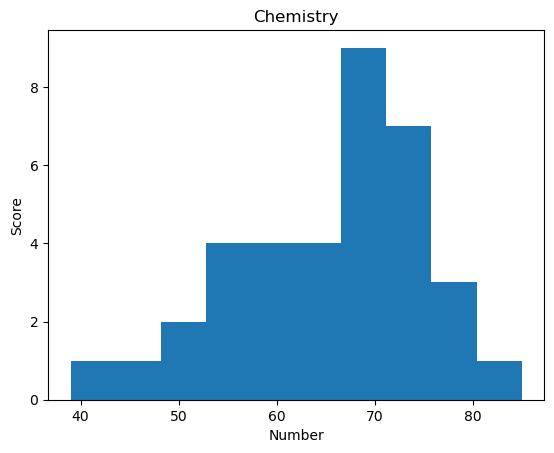

In [18]:
# グラフのタイトル / Set a title of the graph
plt.title('Chemistry')
# x軸のラベル / Set a label of x axis
plt.xlabel('Number')
# y軸のラベル / Set a label of y axis
plt.ylabel('Score')

plt.hist(df2['Chemistry'], bins=10)

## (14) 横軸を数学、縦軸を英語で散布図を書いてください。
Draw a scatter plot with Math on the horizontal axis and English on the vertical axis.

グラフの軸にはラベルを付け、正方形にプロットしてください。<br>
プロット範囲は、0 < x < 100 と、0 < y < 100　としてください。
x軸とy軸の比率が等しい正方形の図を作成してください。<br>

The axes of the graph should be labeled and plotted in a square.<br>
The range of the axes should be 0 < x < 100 and 0 < y < 100. 

[Week 4: scatter plot](Ex_Week4.ipynb#scatterplot)

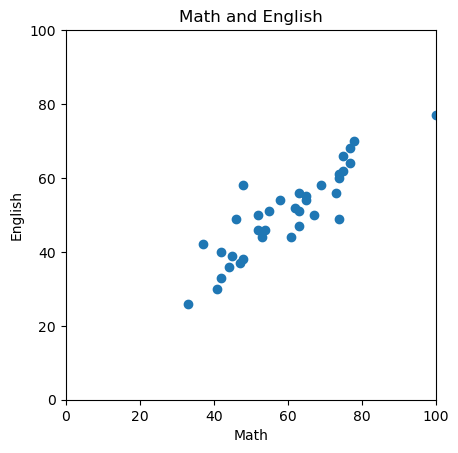

In [19]:
# 正方形でプロット. Plot in a square.
# グラフのタイトル / Set a title of the graph
plt.title('Math and English')
# x軸のラベル / Set a label of x axis
plt.xlabel('Math')
# y軸のラベル / Set a label of y axis
plt.ylabel('English')
# xのプロット範囲 / Set a range of x axis : 0 < x < 100
plt.xlim(0, 100)
# yのプロット範囲 / Set a range of y axis : 0 < y < 100
plt.ylim(0, 100)

# 横軸を数学、縦軸を英語で散布図を書いてください。
plt.scatter(df2['Math'], df2['English'])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()



## (15) 数学を説明変数、英語を目的変数として、線形単回帰分析をしてください。
Perform a linear simple regression analysis with mathematics as the explanatory variable and English as the objective variable.

[Week 6: linear regression](Ex_Week6.ipynb)

In [20]:
# 機械学習ライブラリ / Machine learning library


In [21]:
# 線形回帰の関数に変数を入力する際に、DataFrameではなくて、numpy配列でないといけないので、変換する。
# You have to convert a Series to a numpy array to use it as an input of linear regression.
# Explanatory variable (Math)
x = df2.Math.values
y = df2.English.values

# Objective variable (English)


# reshapeを使って各データを1Dデータと明示する / Define the dimension of the array explicitly with reshape.
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)



In [22]:
from sklearn import linear_model

In [23]:
# 線形回帰のインスタンスを生成 / create an instance of simple regression
model = linear_model.LinearRegression()

# 学習実行 / apply fit
model.fit(x, y)

# xに対する予測値を計算 / obtain the predicted value.
reg_y = model.predict(x)             


## (16) 数学の点が80点だった時、英語の点は何点取れていると予想できるでしょうか？
If you scored 80 in math, how many points can you expect to get in English?

[Week 6: linear regression](Ex_Week6.ipynb)

In [24]:
a = model.predict([[80]])
print(a)

[[64.6908222]]


# お疲れさまでした!! Well done!!